<a href="https://colab.research.google.com/github/hananbahtiti/Predicting-Road-Accident-Risk/blob/main/Predicting_Road_Accident_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
!ls "/content/drive/MyDrive/Predicting Road Accident Risk/Data"

test.csv  train.csv


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Predicting Road Accident Risk/Data/train.csv")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  bool   
 11  school_season           517754 non-null  bool   
 12  num_reported_accidents  517754 non-null  int64  
 13  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [3]:
data.describe()

,id,num_lanes,curvature,speed_limit,num_reported_accidents,accident_risk
count,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000
mean,258876.500000,2.491511,0.488719,46.112575,1.187970,0.352377
std,149462.849974,1.120434,0.272563,15.788521,0.895961,0.166417
min,0.000000,1.000000,0.000000,25.000000,0.000000,0.000000
25%,129438.250000,1.000000,0.260000,35.000000,1.000000,0.230000
50%,258876.500000,2.000000,0.510000,45.000000,1.000000,0.340000
75%,388314.750000,3.000000,0.710000,60.000000,2.000000,0.460000
max,517753.000000,4.000000,1.000000,70.000000,7.000000,1.000000


In [4]:
data.drop("id", axis=1, inplace=True)

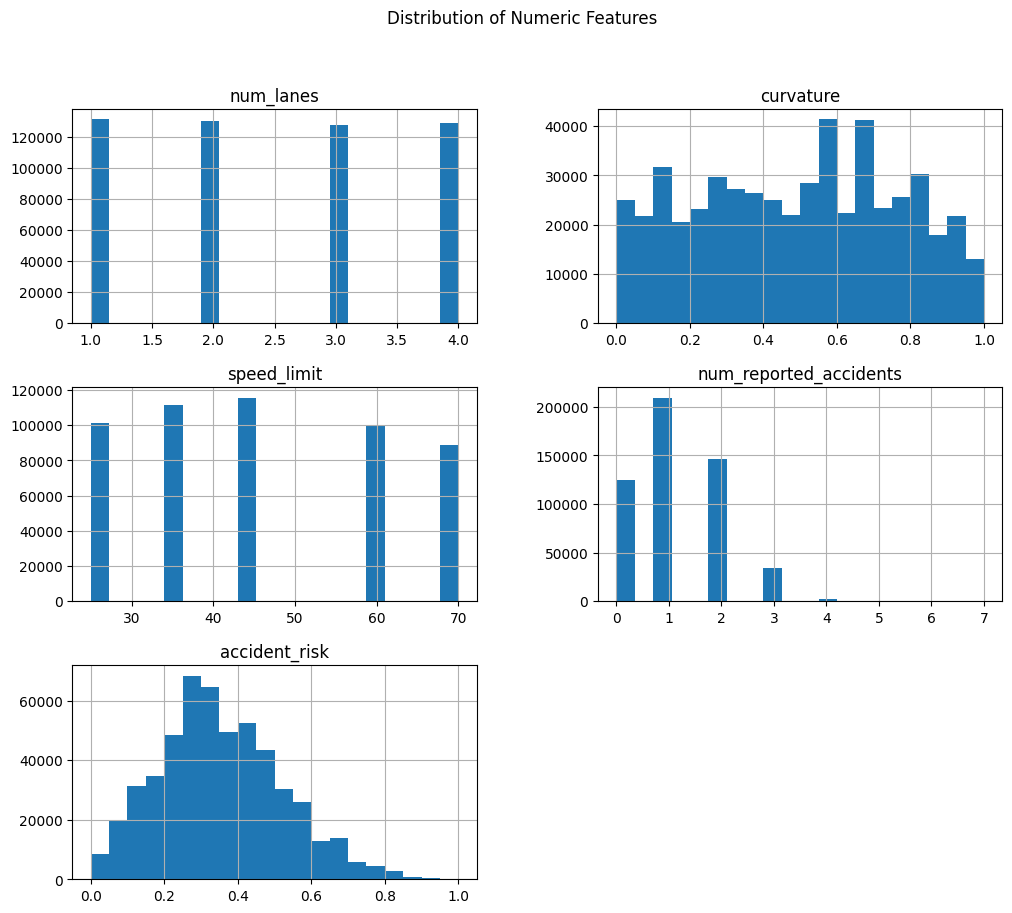

In [5]:

data.hist(figsize=(12, 10), bins=20)
plt.suptitle("Distribution of Numeric Features")
plt.show()

Index(['road_type', 'lighting', 'weather', 'time_of_day'], dtype='object')


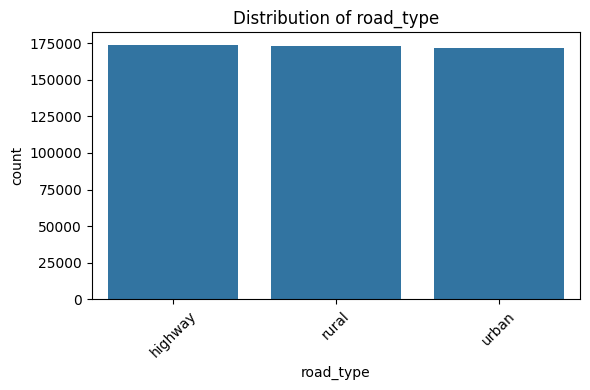

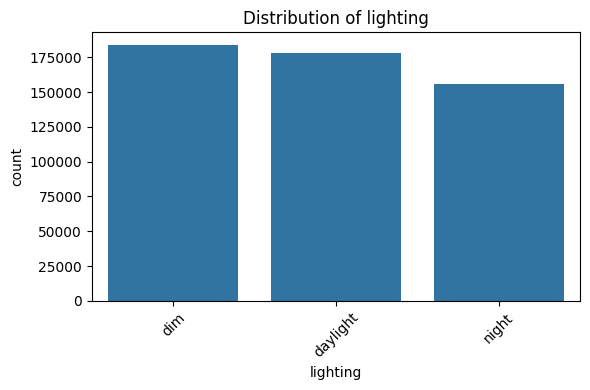

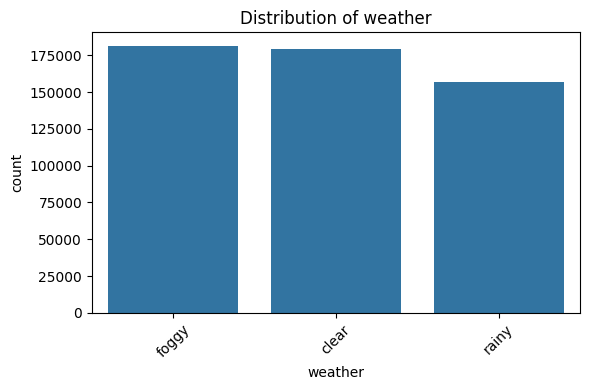

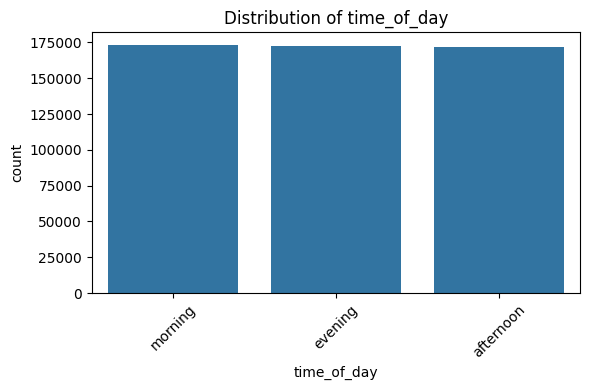

In [6]:

object_cols = data.select_dtypes(include='object').columns
print(object_cols)


for col in object_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-3477741037.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=col, y="accident_risk", estimator="mean", ci=None,


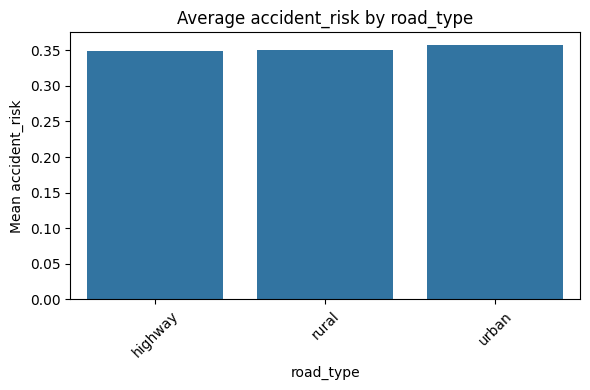

/tmp/ipython-input-3477741037.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=col, y="accident_risk", estimator="mean", ci=None,


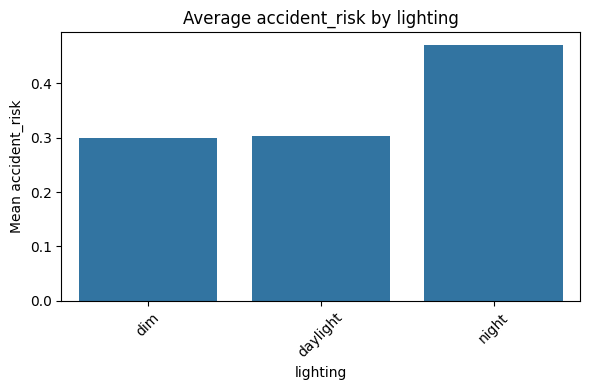

/tmp/ipython-input-3477741037.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=col, y="accident_risk", estimator="mean", ci=None,


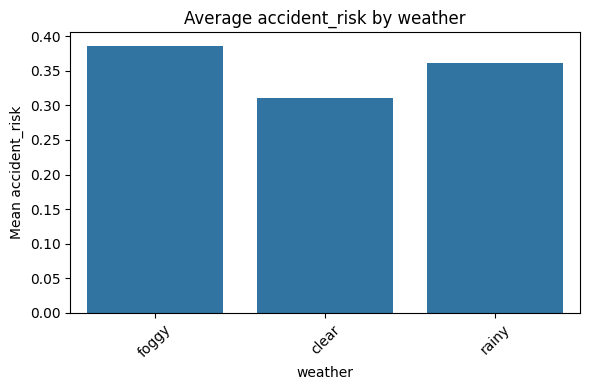

/tmp/ipython-input-3477741037.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=col, y="accident_risk", estimator="mean", ci=None,


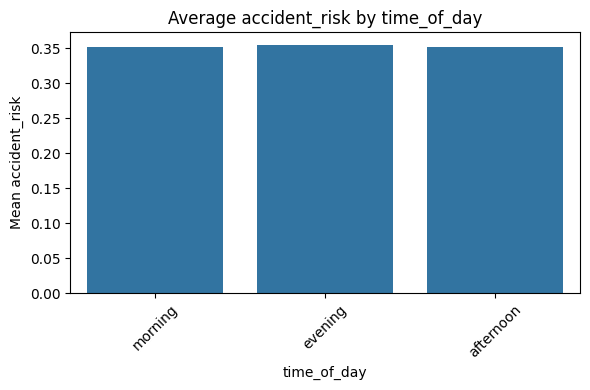

In [7]:


# تحديد الأعمدة الفئوية (object)
object_cols = data.select_dtypes(include='object').columns

# رسم العلاقة بين كل عمود فئوي و accident_risk
for col in object_cols:
    plt.figure(figsize=(6, 4))
    sns.barplot(data=data, x=col, y="accident_risk", estimator="mean", ci=None,
                order=data[col].value_counts().index)
    plt.title(f"Average accident_risk by {col}")
    plt.ylabel("Mean accident_risk")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

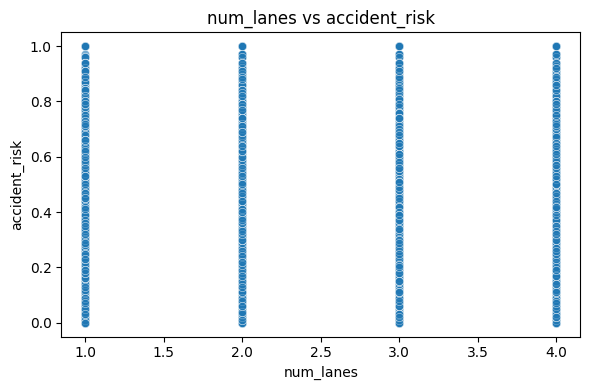

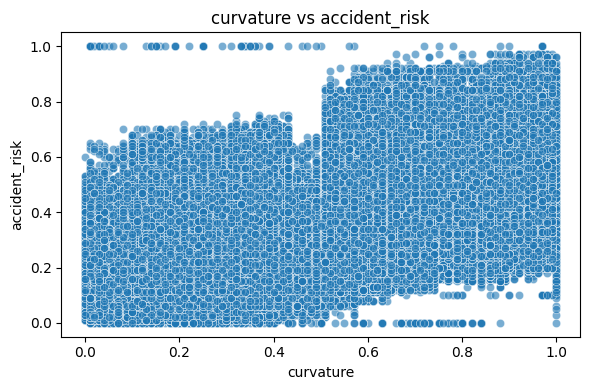

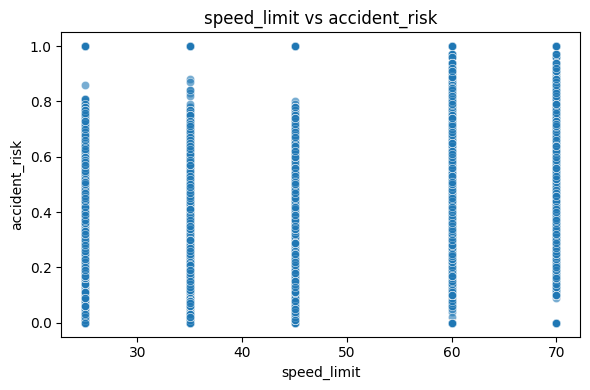

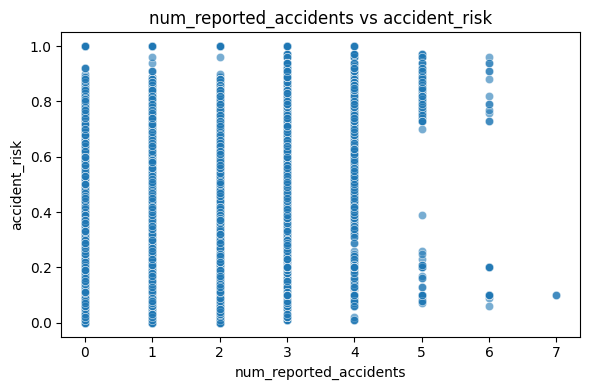

In [8]:

# تحديد الأعمدة العددية
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = [col for col in numeric_cols if col != 'accident_risk']  # استثناء الهدف

# رسم scatter لكل عمود عددي مقابل accident_risk
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=data, x=col, y='accident_risk', alpha=0.6)
    plt.title(f"{col} vs accident_risk")
    plt.xlabel(col)
    plt.ylabel("accident_risk")
    plt.tight_layout()
    plt.show()

<Axes: xlabel='speed_limit', ylabel='accident_risk'>

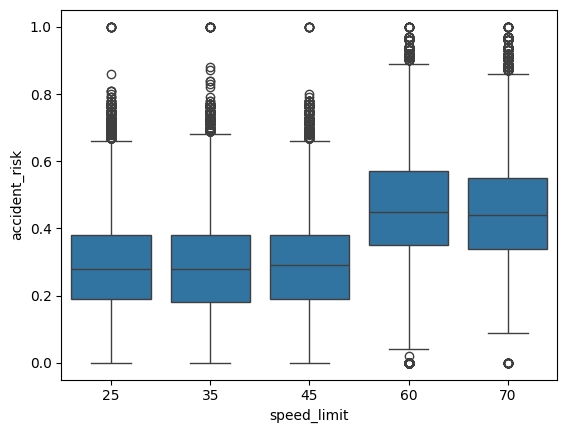

In [10]:
import seaborn as sns
sns.boxplot(data=data, x="speed_limit", y="accident_risk")

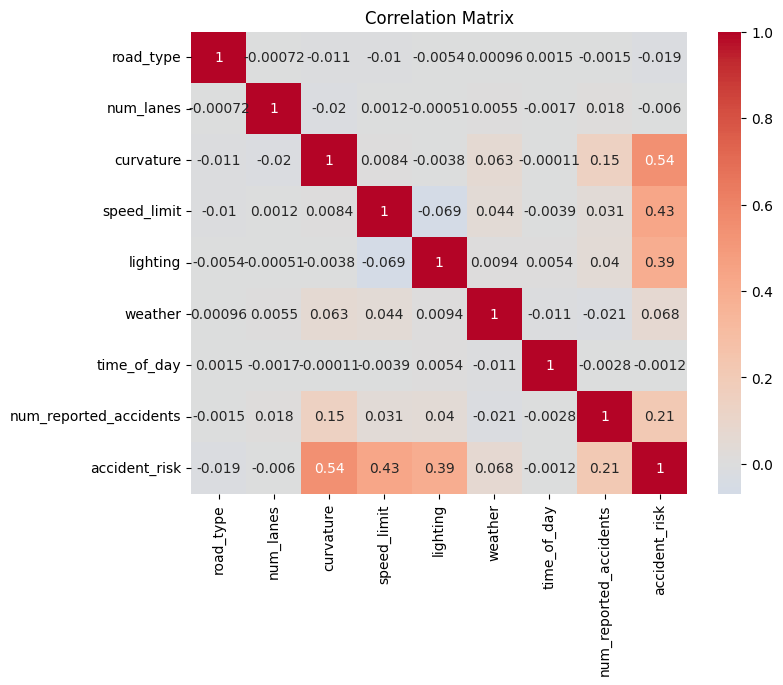

In [15]:

for col in data.columns:
    if data[col].dtype == 'object':
        data[col], _ = pd.factorize(data[col])

numeric_cols = data.select_dtypes(include=['number'])
corr = numeric_cols.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()